# Programing Exercise 2-Logistic regression 



In [111]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from mpl_toolkits.mplot3d import axes3d
import scipy.optimize as opt     # optimasation function imported 
from scipy.optimize import minimize  # Minimisation function imported 
 

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')
%config IPCompleter.greedy=True

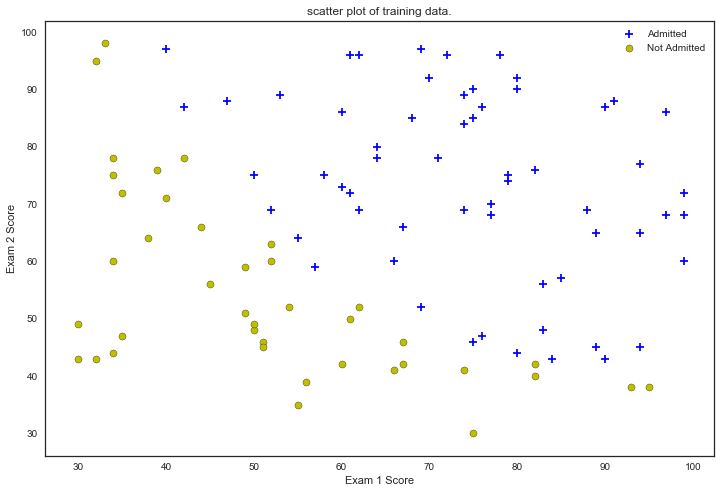

In [112]:
data = np.loadtxt('ex2/ex2data1.txt', delimiter=',',dtype =int)

X  = np.array(data) 
y = X[:,2] #admitted
y = np.c_[y]
X  = np.insert(X,0,1,axis=1)
X_matrix  = np.delete(X,3,1)


df = pd.DataFrame({'Exam1':data[:,0],'Exam2':data[:,1], 'Admitted':data[:,2]})


positive = data[df['Admitted'].isin([1])]  
negative = data[df['Admitted'].isin([0])] 

positive = pd.DataFrame({'Exam1':positive[:,0],'Exam2':positive[:,1], 'Admitted':positive[:,2]})
negative = pd.DataFrame({'Exam1':negative[:,0],'Exam2':negative[:,1], 'Not Admitted':negative[:,2]})

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='+', label='Admitted')  
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='y', edgecolors='black', marker='o', label='Not Admitted') 
plt.title('scatter plot of training data.')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
dummy = plt.legend()


** Warm up (Sigmoid function)** <a id='sig'></a> 

In [113]:
def sigmoid(x): ## sigmoid method using equation 
    
    temp = 1 / (1 + np.exp(-x)) ##using numpy takes diffrent structures than maths
    return (temp)

Text(0.5,1,'Sigmoid function')

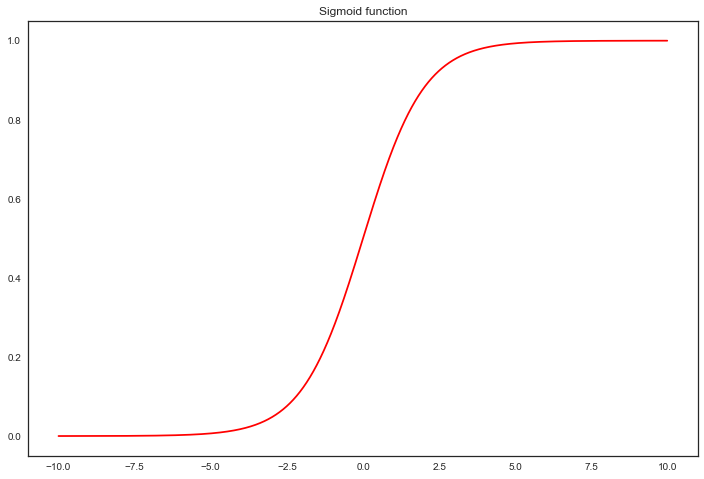

In [95]:
mu, sigma = 0, 5 # mean and standard deviation
s = np.random.normal(mu, sigma, size = (5,20)) ## matrix
nums = np.arange(-10, 10, step=0.01) # Step cpontrols interval which turns from step function into sigmoid 

fig, ax = plt.subplots(figsize=(12,8)) 

ax.plot(nums, sigmoid(nums), 'r')  
plt.title('Sigmoid function')

** cost function** <a id='sig'></a> 

In [117]:
def costfunction(theta, X, y):
    m = y.size # optain size of input matrix (100 in this case)
    
    theta = np.matrix(theta) # turn theta into a matrix from vector (i.e a 1 X 3 matrix in this case) 
    y = np.matrix(y) # turn y ( binary result) into a matrix from vector (i.e a 1 X 100 matrix in this case) 
    X = np.matrix(X) # turn X ( both fetures and theta0) into a matrix from vector (i.e a 100 X 3 matrix in this case) 
    h = sigmoid(X * theta.T) # Perform h(thetea) = g(theta.T dot x) ( hypothsis construction)
    first = np.multiply(-y.T, np.log(h))  #i.e matrix multipcation  and then multiply by -y 
    second = np.multiply((1-y.T), np.log(1-h))
    cost =  np.sum(first - second)/first.size
    return (cost)

In [118]:
initial_theta = np.zeros(3,dtype = int)  
costfunction(initial_theta, X_matrix, y)


0.69314718055994529

** graident minimisation function ** <a id='sig'></a> 

In [ ]:
# We need to calculat graident as specified 

In [121]:
#fmin_tnc(x, *args) is mimisation funtion using  truncated Newton conjugater Graident which allows bound constarins
#Return f and g, where f is the value of the function and g its gradient (a list of floats).
#Return the function value but supply gradient function seperately as fprime.
#Return the function value and set approx_grad=True
#fmin_tnc(func, x0, fprime=None, args=(), approx_grad=0, bounds=None, epsilon=1e-08, scale=None, offset=None, messages=15, maxCGit=-1, maxfun=None, eta=-1, stepmx=0, accuracy=0, fmin=0, ftol=-1, xtol=-1, pgtol=-1, rescale=-1, disp=None, callback=None)[source]
# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.optimize.fmin_tnc.html

result = opt.fmin_tnc(func=costfunction, x0=initial_theta, fprime=gradient, args=(X_matrix, y))  
cost(result[0], X, y)  

NameError: name 'gradient' is not defined